In [1]:
import pandas as pd
import numpy as np
   
tourney_df = pd.read_csv("data/trainingdata.csv")
tourney_df.tail()

,Unnamed: 0,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,team0Win,...,USA1,WIL1,WLK1,WMR1,WMV1,WOB1,WOL1,WTE1,YAG1,ZAM1
83084,83084,2018,132,1153,56,1222,55,N,0,0,...,8.0,7.0,4.0,NaN,8.0,5.0,4.0,NaN,7.0,6.0
83085,83085,2018,132,1172,58,1348,57,N,0,0,...,NaN,91.0,60.0,NaN,74.0,94.0,91.0,NaN,44.0,39.0
83086,83086,2018,132,1209,74,1426,61,N,0,0,...,NaN,160.0,125.0,NaN,138.0,158.0,143.0,NaN,134.0,117.0
83087,83087,2018,132,1246,77,1397,72,N,0,1,...,12.0,8.0,12.0,NaN,10.0,9.0,12.0,NaN,18.0,13.0
83088,83088,2018,132,1335,68,1217,65,N,0,1,...,NaN,188.0,159.0,NaN,169.0,177.0,147.0,NaN,144.0,166.0


In [2]:
tourney_df.columns

Index(['Unnamed: 0', 'Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID',
       'LScore', 'WLoc', 'NumOT', 'team0Win',
       ...
       'USA1', 'WIL1', 'WLK1', 'WMR1', 'WMV1', 'WOB1', 'WOL1', 'WTE1', 'YAG1',
       'ZAM1'],
      dtype='object', length=345)

In [3]:
tourney_df = tourney_df.fillna(-1000000)

# Choosing Features to Use for Model

# Only execute one of following two cells

Use first cell to use all the features available in the submission file.  After running through notebook once, can look at best features found by random forest and edit this.

In [7]:
systems = ['SAG', 'MOR', 'WLK', 'POM', 'DOL', 'RPI', 'DOK', 'PGH']
teamfList = systems
featureList = []
for f in teamfList:
    featureList.append(f+'0')
    featureList.append(f+'1')
featureList = ['ACU0', 'BBT0', 'BWE0', 'DOK0', 'KPK0', 'MAS0', 'MOR0', 'PGH0', 'PIG0', 'POM0', 'RTP0', 'SAG0', 'TRK0', 'TRP0', 'WIL0', 'DII0', 'BIH0', 'WLK0', '7OT0', 'BUR0', 'DOL0', 'NOL0', 'SFX0', 'BOB0', 'COL0', 'CRO0', 'EBP0', 'MSX0', 'RTR0', 'SP0', 'TPR0', 'BLS0', 'CNG0', 'RTH0', 'SPR0', 'WOL0', 'DCI0', 'KRA0', 'LMC0', 'REW0', 'SEL0', 'SPW0', 'WOB0', 'ARG0', 'DC0', 'STH0', 'RPI0', 'HKB0', 'ACU1', 'BBT1', 'BWE1', 'DOK1', 'KPK1', 'MAS1', 'MOR1', 'PGH1', 'PIG1', 'POM1', 'RTP1', 'SAG1', 'TRK1', 'TRP1', 'WIL1', 'DII1', 'BIH1', 'WLK1', '7OT1', 'BUR1', 'DOL1', 'NOL1', 'SFX1', 'BOB1', 'COL1', 'CRO1', 'EBP1', 'MSX1', 'RTR1', 'SP1', 'TPR1', 'BLS1', 'CNG1', 'RTH1', 'SPR1', 'WOL1', 'DCI1', 'KRA1', 'LMC1', 'REW1', 'SEL1', 'SPW1', 'WOB1', 'ARG1', 'DC1', 'STH1', 'RPI1', 'HKB1']#, 'tourneylike']

In [8]:
print(featureList)

['ACU0', 'BBT0', 'BWE0', 'DOK0', 'KPK0', 'MAS0', 'MOR0', 'PGH0', 'PIG0', 'POM0', 'RTP0', 'SAG0', 'TRK0', 'TRP0', 'WIL0', 'DII0', 'BIH0', 'WLK0', '7OT0', 'BUR0', 'DOL0', 'NOL0', 'SFX0', 'BOB0', 'COL0', 'CRO0', 'EBP0', 'MSX0', 'RTR0', 'SP0', 'TPR0', 'BLS0', 'CNG0', 'RTH0', 'SPR0', 'WOL0', 'DCI0', 'KRA0', 'LMC0', 'REW0', 'SEL0', 'SPW0', 'WOB0', 'ARG0', 'DC0', 'STH0', 'RPI0', 'HKB0', 'ACU1', 'BBT1', 'BWE1', 'DOK1', 'KPK1', 'MAS1', 'MOR1', 'PGH1', 'PIG1', 'POM1', 'RTP1', 'SAG1', 'TRK1', 'TRP1', 'WIL1', 'DII1', 'BIH1', 'WLK1', '7OT1', 'BUR1', 'DOL1', 'NOL1', 'SFX1', 'BOB1', 'COL1', 'CRO1', 'EBP1', 'MSX1', 'RTR1', 'SP1', 'TPR1', 'BLS1', 'CNG1', 'RTH1', 'SPR1', 'WOL1', 'DCI1', 'KRA1', 'LMC1', 'REW1', 'SEL1', 'SPW1', 'WOB1', 'ARG1', 'DC1', 'STH1', 'RPI1', 'HKB1']


In [9]:
y = tourney_df['team0Win'].values # results
X = tourney_df[featureList].values # features

In [10]:
testyears = [2012,2013,2014,2015]
mask = tourney_df['Season'] == testyears[0]
for yr in testyears[1:]:
    mask = mask | (tourney_df['Season'] == yr)
mask = mask & (tourney_df['TourneyGame'] == 1)
tourney_df[mask].shape

(268, 345)

In [11]:
df_test = tourney_df[mask]
df_train = tourney_df[np.logical_not(mask)]

In [12]:
y_train = df_train['team0Win'].values # results
X_train = df_train[featureList].values # features
y_test = df_test['team0Win'].values # results
X_test = df_test[featureList].values # features

In [13]:
X_test

array([[-1.00e+06,  3.90e+01, -1.00e+06, ...,  4.20e+01,  4.50e+01,
         4.00e+01],
       [-1.00e+06,  1.84e+02, -1.00e+06, ...,  1.93e+02,  1.89e+02,
         1.87e+02],
       [-1.00e+06,  6.80e+01, -1.00e+06, ...,  3.10e+01,  3.70e+01,
         3.50e+01],
       ...,
       [ 4.00e+00,  7.00e+00,  6.00e+00, ...,  2.20e+01,  2.30e+01,
         2.30e+01],
       [ 1.00e+00,  1.00e+00,  1.00e+00, ...,  3.00e+00,  4.00e+00,
         2.00e+00],
       [ 2.00e+00,  3.00e+00,  2.00e+00, ...,  5.00e+00,  6.00e+00,
         7.00e+00]])

# Train our model!

In [14]:
size=X_train.shape[0] #Number of training examples to use
X_train_sample = X_train[0:size]
y_train_sample = y_train[0:size]

In [24]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
space ={
        'max_depth': hp.randint('x_max_depth',  20),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.8, 1),
        'scale_pos_weight': hp.uniform("x_pos_weight", 1, 15),
        "learning_rate":hp.uniform("x_learning_rate",0.0003,0.003),
        'colsample_bytree': hp.uniform ('x_tree_colsample', 0.4,1),
}

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
def objective(space):

    clf = XGBClassifier(n_estimators = 100, 
                            max_depth = space['max_depth'], 
                            min_child_weight =space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree =space['colsample_bytree'],
                            learning_rate = space['learning_rate'], seed = 0)
    
    params = clf.get_xgb_params()
    #dtest
    score = xgb.cv(params, dtrain, nfold = 5, metrics = "logloss", early_stopping_rounds=10)
    print(score)
    #score = cross_val_score(clf, trainX, trainY, cv = 5, scoring="average_precision")
    
    bst = xgb.train(params, dtrain)
    preds = bst.predict(dtest)
    test_score = metrics.log_loss(y_test, preds)
    
    print("HOLDOUT SCORE", test_score)

    return{'loss':1-test_score, 'status': STATUS_OK, "holdout":test_score }

In [21]:
%%time
trials = Trials()
import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 50, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

HOLDOUT SCORE                                       
0.6877941473651288                                  
HOLDOUT SCORE                                                                
0.6931380742966239                                                           
HOLDOUT SCORE                                                                
0.690360869489499                                                            
HOLDOUT SCORE                                                                
0.6923826997404667                                                           
HOLDOUT SCORE                                                                
0.6913291344891733                                                           
HOLDOUT SCORE                                                                
0.6931349136936131                                                           
HOLDOUT SCORE                                                                
0.6918034820414302                  

In [25]:
best

{'x_learning_rate': 0.002050596297567944,
 'x_max_depth': 0,
 'x_min_child': 8.0,
 'x_pos_weight': 4.730737378579532,
 'x_subsample': 0.836933526126366,
 'x_tree_colsample': 0.5831213255266434}

In [26]:
best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"])
params = best_xgbc.get_xgb_params()
score = xgb.cv(params, dtrain, nfold = 5, metrics = "logloss", verbose_eval=True)
print(score)
bst = xgb.train(params, dtrain)
preds = bst.predict(dtest)
score = metrics.average_precision_score(y_test, preds)
print(score)

[0]	train-logloss:0.693179+5.15364e-06	test-logloss:0.693156+1.90641e-05
[1]	train-logloss:0.693164+1.0012e-05	test-logloss:0.693168+3.74091e-05
[2]	train-logloss:0.693183+1.06132e-05	test-logloss:0.693181+5.551e-05
[3]	train-logloss:0.693212+3.27084e-05	test-logloss:0.693195+7.49256e-05
[4]	train-logloss:0.6932+2.32241e-05	test-logloss:0.693217+9.78844e-05
[5]	train-logloss:0.693254+2.83238e-05	test-logloss:0.693234+0.000114052
[6]	train-logloss:0.693241+5.03929e-05	test-logloss:0.693255+0.000130534
[7]	train-logloss:0.693275+2.57527e-05	test-logloss:0.693277+0.000155688
[8]	train-logloss:0.693312+3.85456e-05	test-logloss:0.693304+0.000171146
[9]	train-logloss:0.693325+4.65334e-05	test-logloss:0.693326+0.000191458
   train-logloss-mean  train-logloss-std  test-logloss-mean  test-logloss-std
0            0.693179           0.000005           0.693156          0.000019
1            0.693164           0.000010           0.693168          0.000037
2            0.693183           0.000011 

In [19]:
best_xgbc.fit(X_train, y_train)
y_pred = best_xgbc.predict_proba(X_test) # probability that team0 wins (what Kaggle calls team 1, and wants for submission)
from sklearn import metrics
test_score = metrics.log_loss(y_test, y_pred)
print("Log loss is {0}".format(test_score))

Log loss is 0.7304882416084632


In [15]:
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve

In [16]:
%%time
cv_s = StratifiedShuffleSplit(n_splits=10 , test_size=0.1, random_state=42)
rfc = RandomForestClassifier(max_features= 'auto' ,n_estimators=50) 
param_grid = { 
        'n_estimators': [1000],
        'max_features': ['sqrt']}
CV_rfc = GridSearchCV(n_jobs=-1, estimator=rfc, scoring="neg_log_loss", param_grid=param_grid, cv=cv_s)
CV_rfc.fit(X_train_sample, y_train_sample)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.1,
            train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [1000], 'max_features': ['sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [17]:
print("The best parameters are {%s} with a score of %0.4f" % (CV_rfc.best_params_, CV_rfc.best_score_))

The best parameters are {{'max_features': 'sqrt', 'n_estimators': 1000}} with a score of -0.5978


In [18]:
model = CV_rfc.best_estimator_
y_pred = model.predict_proba(X_test) # probability that team0 wins (what Kaggle calls team 1, and wants for submission)
from sklearn import metrics
test_score = metrics.log_loss(y_test, y_pred)
print("Log loss is {0}".format(test_score))

Log loss is 0.5795399735865063


In [19]:
metrics.accuracy_score(y_test, model.predict(X_test))

0.6865671641791045

In [20]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [21]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], tourney_df[featureList].columns[indices[f]],importances[indices[f]]))

Feature ranking:
1. feature 11 SAG0 (0.030772)
2. feature 59 SAG1 (0.030672)
3. feature 6 MOR0 (0.029774)
4. feature 54 MOR1 (0.029697)
5. feature 9 POM0 (0.027799)
6. feature 57 POM1 (0.027265)
7. feature 8 PIG0 (0.027136)
8. feature 65 WLK1 (0.026877)
9. feature 17 WLK0 (0.026195)
10. feature 56 PIG1 (0.025386)
11. feature 3 DOK0 (0.023761)
12. feature 51 DOK1 (0.022906)
13. feature 40 SEL0 (0.019032)
14. feature 88 SEL1 (0.018973)
15. feature 16 BIH0 (0.018854)
16. feature 64 BIH1 (0.018619)
17. feature 53 MAS1 (0.017296)
18. feature 41 SPW0 (0.016471)
19. feature 89 SPW1 (0.016222)
20. feature 5 MAS0 (0.016110)
21. feature 52 KPK1 (0.013874)
22. feature 55 PGH1 (0.013564)
23. feature 72 COL1 (0.013561)
24. feature 4 KPK0 (0.013507)
25. feature 24 COL0 (0.013412)
26. feature 7 PGH0 (0.013243)
27. feature 68 DOL1 (0.012379)
28. feature 20 DOL0 (0.012337)
29. feature 62 WIL1 (0.011588)
30. feature 14 WIL0 (0.011550)
31. feature 32 CNG0 (0.011475)
32. feature 80 CNG1 (0.011421)
33. fea

In [30]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], tourney_df[featureList].columns[indices[f]],importances[indices[f]]))

Feature ranking:
1. feature 7 POM1 (0.072302)
2. feature 10 RPI0 (0.069910)
3. feature 4 WLK0 (0.067345)
4. feature 6 POM0 (0.066720)
5. feature 5 WLK1 (0.064850)
6. feature 0 SAG0 (0.064251)
7. feature 12 DOK0 (0.063912)
8. feature 13 DOK1 (0.063283)
9. feature 3 MOR1 (0.063236)
10. feature 2 MOR0 (0.062223)
11. feature 11 RPI1 (0.060458)
12. feature 1 SAG1 (0.060014)
13. feature 9 DOL1 (0.059860)
14. feature 8 DOL0 (0.056782)
15. feature 14 PGH0 (0.052667)
16. feature 15 PGH1 (0.052187)


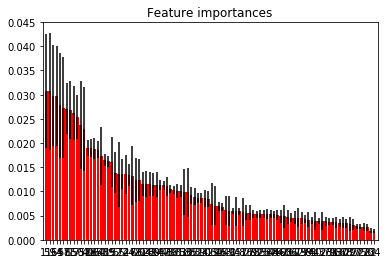

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

maxval = len(featureList)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1])[:maxval], importances[indices][:maxval],
       color="r", yerr=std[indices][:maxval], align="center")
plt.xticks(range(X.shape[1])[:maxval], indices)
plt.xlim([-1, maxval])
plt.show()

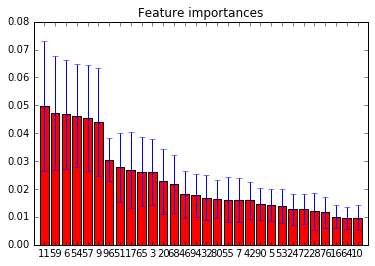

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt

maxval = Nfeatures
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1])[:maxval], importances[indices][:maxval],
       color="r", yerr=std[indices][:maxval], align="center")
plt.xticks(range(X.shape[1])[:maxval], indices)
plt.xlim([-1, maxval])
plt.show()

# Write Submission

In [25]:
def write_submission_file(model, featureList, submission_output_file): # see submission.ipynb for details
    import pandas as pd
    sample_df = pd.read_csv('data/2016SampleSubmissionWithFeatures.csv', index_col=0)
    Xsample = sample_df[featureList].values
    sample_df['Pred'] = model.predict_proba(Xsample)[:,1] # predict_proba returns [prob label is 0, prob label is 1], kaggle wants 2nd column
    submission = sample_df[['Id', 'Pred']]
    submission.to_csv(submission_output_file, encoding='ascii', index=False)
submission_output_file = "data/submissionRF6000.csv"
write_submission_file(model, featureList, submission_output_file)

FileNotFoundError: File b'data/2016SampleSubmissionWithFeatures.csv' does not exist

In [107]:
submission_df = pd.read_csv(submission_output_file, index_col=0)
submission_df.head()

,Pred
Id,
2016_1112_1114,0.648
2016_1112_1122,0.780
2016_1112_1124,0.658
2016_1112_1138,0.773
2016_1112_1139,0.690
